# Project 5: Influence of translation on Poetry Style Assessment

This notebook covers the comparation of the inherent stylistic properties of Shakespeare's Hamlet. 
This work is conducted as a part of course *Natural Language Processing and Text Mining* (521158S), taught in the *University of Oulu* in autumn 2022

## Authors

   - Olli
       - Insert
   - Saku
       - Studentnummer
   - Joose
       - i här
   

## Introduction 

This project aims to investigate the structure of poetry in terms of original structure of the poems with respect to existing corpus. We shall concentrate on Chakspeare HAMLET, with a comparison between its original English version and French translation. We are comparing the preservation of inherent stylistic properties through this translation.  

## Task 1

> 1. Write a script that allows you to retrieve the text corresponding to HAMLET (character) sayings in the manuscript, while discarding stopwords and numbering and any non-related text. Separate the sayings of HAMLET character at each act for both original text and translation.  

Analyzation of Hamlet EN:

In [ ]:
import nltk
import numpy as np
import re 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')  
nltk.download('omw-1.4') 
nltk.download('stopwords')  

file1 = open("HamletEN.txt", "r")



seperate = []

playEN = [[],
          [],
          [],
          [],
          []]

act = 0


#skips the play information
while True:
    line = file1.readline() 
    if line:
        try:
            if (line[0]+line[1]+line[2]) == "ACT":
                break
            else:
                pass       
        except IndexError:
            pass
            
#get sentences. Contains stage directions
while True:
    line = file1.readline() 
    if line:
        try:
            if (line[0]+line[1]+line[2]) == "ACT":
                act += 1
            if (line[0]+line[1]+line[2]+line[3]+line[4]+line[5]) == "HAMLET":
                if line.split("HAMLET", 1)[1] != "\n":
                    seperate.append(line.split("HAMLET", 1)[1].rstrip())
                line = file1.readline()
                while line != '\n' :
                    seperate.append(line.rstrip())
                    line = file1.readline()
                thisLine = ' '.join(seperate)
                playEN[act].append(thisLine)
                seperate = []              
        except IndexError:
            pass
    else :
        file1.close()
        break 
        

#remove special characters except brackets which contain stage direction
whitelist = set('abcdefghijklmnopqrstuvwxyz\[ \]\-- ABCDEFGHIJKLMNOPQRSTUVWXYZ')

noSpecialCharPrepEN = [["".join(filter(whitelist.__contains__, x)) for x in playEN[0]],
                       ["".join(filter(whitelist.__contains__, x)) for x in playEN[1]],
                       ["".join(filter(whitelist.__contains__, x)) for x in playEN[2]],
                       ["".join(filter(whitelist.__contains__, x)) for x in playEN[3]],
                       ["".join(filter(whitelist.__contains__, x)) for x in playEN[4]]]

#Replace "--" with a whitespace
noSpecialCharEN = [[re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[0]],
                   [re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[1]],
                   [re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[2]],
                   [re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[3]],
                   [re.sub("[--]", " ", x).strip() for x in noSpecialCharPrepEN[4]]]               



#remove stage direction
noDirectPlayPrepEN = [[re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[0]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[1]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[2]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[3]],
                      [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in noSpecialCharEN[4]]]

# Removes extra whitespaces
noDirectPlayEN = [[re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[0]],
                  [re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[1]],
                  [re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[2]],
                  [re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[3]],
                  [re.sub(' +', ' ', x).strip() for x in noDirectPlayPrepEN[4]]]


#make everything lower case
allLowerEN = [[ x.lower() for x in noDirectPlayEN[0]],
              [ x.lower() for x in noDirectPlayEN[1]],
              [ x.lower() for x in noDirectPlayEN[2]],
              [ x.lower() for x in noDirectPlayEN[3]],
              [ x.lower() for x in noDirectPlayEN[4]]]

#tokenize
tokensEN = [[ nltk.word_tokenize(x) for x in allLowerEN[0]],
            [ nltk.word_tokenize(x) for x in allLowerEN[1]],
            [ nltk.word_tokenize(x) for x in allLowerEN[2]],
            [ nltk.word_tokenize(x) for x in allLowerEN[3]],
            [ nltk.word_tokenize(x) for x in allLowerEN[4]]]
        
#remove stopwords
stop_wordsEN = set(line.strip() for line in open('stop_words_english.txt', encoding="utf8"))
noStopwprepEN = [[[t for t in x if t not in stop_wordsEN ]  for x in tokensEN[0]],
                 [ [t for t in x if t not in stop_wordsEN ]  for x in tokensEN[1]],
                 [ [t for t in x if t not in stop_wordsEN ]  for x in tokensEN[2]],
                 [ [t for t in x if t not in stop_wordsEN ]  for x in tokensEN[3]],
                 [ [t for t in x if t not in stop_wordsEN ]  for x in tokensEN[4]]]

#remove empty lines
noStopwEN = [[ x for x in noStopwprepEN[0] if x != []],
             [ x for x in noStopwprepEN[1] if x != []],
             [ x for x in noStopwprepEN[2] if x != []],
             [ x for x in noStopwprepEN[3] if x != []],
             [ x for x in noStopwprepEN[4] if x != []]]

#lemmatization
lemmatizer = WordNetLemmatizer()
lemmaEN = [[ [lemmatizer.lemmatize(t) for t in x ]  for x in noStopwEN[0]],
           [ [lemmatizer.lemmatize(t) for t in x ]  for x in noStopwEN[1]],
           [ [lemmatizer.lemmatize(t) for t in x ]  for x in noStopwEN[2]],
           [ [lemmatizer.lemmatize(t) for t in x ]  for x in noStopwEN[3]],
           [ [lemmatizer.lemmatize(t) for t in x ]  for x in noStopwEN[4]]]



#remove act and line seperation
wordsEN = []
for act in lemmaEN:
    for line in act:
        for word in line:
            wordsEN.append(word)

#unique words only
def unique(list1):
  
    # initialize a null list
    unique_list = []
  
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    return unique_list

uniqueEN = unique(wordsEN)


print(noDirectPlayEN)




Analyzation of Hamlet FR

In [ ]:
import spacy
from spacy.tokenizer import Tokenizer
import fr_core_news_md #HOX, python -m spacy download fr_core_news_md
nlp = spacy.load('fr_core_news_md')

file1 = open("HamletFR.txt", "r", encoding="utf8")


playFR =[[],
         [],
         [],
         [],
         []]

act = 0

#skips the play information
while True:
    line = file1.readline() 
    if line:
        try:
            if (line[0]+line[1]+line[2]+line[3]) == "ACTE":
                break
            else:
                pass       
        except IndexError:
            pass
            
#get sentences
while True:
    line = file1.readline() 
    if line:
        try:
            if (line[0]+line[1]+line[2]+line[3]) == "ACTE":
                act += 1
            if (line[0]+line[1]+line[2]+line[3]+line[4]+line[5]) == "HAMLET":
                if line.split("— ", 1)[1] != "\n":
                    playFR [act].append(line.split("— ", 1)[1].rstrip())
                line = file1.readline()
                while line and line != '\n' :
                    playFR [act].append(line.rstrip())
                    line = file1.readline()
        except IndexError:
            pass
    else :
        file1.close()
        break 

#remove stagedirections
noDirectPlayFR = [[re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[0]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[1]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[2]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[3]],
                  [re.sub("[\(\[].*?[\)\]]", "", x).strip() for x in playFR[4]]]


#remove special characters
whitelist = set('abcdefghijklmnopqrstuvwxyzàâèéêëîïôùûüç\'- ÀÂÈÉÊËÎÏÔABCDEFGHIJKLMNOPQRSTUVWXYZ')

noSpecialCharPrepFR  = [[''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR [0]],
                        [''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR [1]],
                        [''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR [2]],
                        [''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR [3]],
                        [''.join(filter(whitelist.__contains__, x)) for x in noDirectPlayFR [4]]]

noSpecialCharFR  = [[re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[0]],
                    [re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[1]],
                    [re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[2]],
                    [re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[3]],
                    [re.sub(' +', ' ', x).strip() for x in noSpecialCharPrepFR[4]]]

#make everything lower case

allLowerFR  = [[ x.lower() for x in noSpecialCharFR[0]],
               [ x.lower() for x in noSpecialCharFR[1]],
               [ x.lower() for x in noSpecialCharFR[2]],
               [ x.lower() for x in noSpecialCharFR[3]],
               [ x.lower() for x in noSpecialCharFR[4]]]

#tokenize 55play

tokenizer = Tokenizer(nlp.vocab)
tokensFR = [[ [t.text for t in tokenizer(x)] for x in allLowerFR[0]],
            [ [t.text for t in tokenizer(x)]  for x in allLowerFR[1]],
            [ [t.text for t in tokenizer(x)]  for x in allLowerFR[2]],
            [ [t.text for t in tokenizer(x)]  for x in allLowerFR[3]],
            [ [t.text for t in tokenizer(x)]  for x in allLowerFR[4]]]
     
#remove stopwords

stop_wordsFR = set(line.strip() for line in open('stop_words_french.txt', encoding="utf8"))
noStopwFR = [[[t for t in x if t not in stop_wordsFR and t != ' ']  for x in tokensFR[0]],
            [ [t for t in x if t not in stop_wordsFR and t != ' ']  for x in tokensFR[1]],
            [ [t for t in x if t not in stop_wordsFR and t != ' ']  for x in tokensFR[2]],
            [ [t for t in x if t not in stop_wordsFR and t != ' ']  for x in tokensFR[3]],
            [ [t for t in x if t not in stop_wordsFR and t != ' ']  for x in tokensFR[4]]]


#lemmatization. Removes act and line seperation




lemmaFR = []

for act in noStopwFR:
    for line in act:
        for word in line:
            doc = nlp(word)
            for token in doc:
                lemmaFR.append(token.lemma_)

                

uniqueFR = unique(lemmaFR)










## Task 2

>2.	Use appropriate Tokenizer to perform the standard preprocessing pipeline (eliminate stopwords, numbers, uncommon characters,..) and recover the root form of individual words using WordNet lemmatizer. Generate the corresponding vocabulary for both English and French corpus and save it a database. Compare the size of the vocabulary of English Corpus and French corpus.


In [80]:

print(len(uniqueEN))
print(len(uniqueFR))


2047
2251



## Task 3

> 3. Use NLTK tokenizer to distinguish various tokens in each text and suggest a script that calculates average length per line in terms of number of characters, and determine the distribution of the lengths after histogram illustration (you may consult NLTK online book for examples). Draw on the same plot the distribution of English and French corpus.   



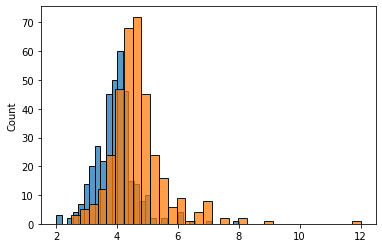

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt



averagesEN = []
length = 0

for act in tokensEN:
    for line in act:
        for word in line:
            length += len(word)
        averagesEN.append(round(length / len(line), 2))
        length = 0

averagesFR = []
length = 0

for act in tokensFR:
    for line in act:
        for word in line:
            length += len(word)
        averagesFR.append(round(length / len(line), 2))
        length = 0

fig, ax = plt.subplots()
q25, q75 = np.percentile(averagesEN, [25, 75])
bin_width = 2 * (q75 - q25) * len(averagesEN) ** (-1/3)
bins = round((max(averagesEN)- min(averagesEN)) / bin_width)

sns.histplot(averagesEN, bins=bins, ax=ax, kde=False);
sns.histplot(averagesFR, bins=bins, ax=ax,  kde=False);


## Task 4

>4.	Suggest a script that draws and estimate Zipf’s law fitting using all data of HAMLET (character) corpus for both English and French (draw on the same plot English and French Zipf’s law fitting (you may consult Project 1 description and links to Zipf’s law fitting and confidence estimation). 



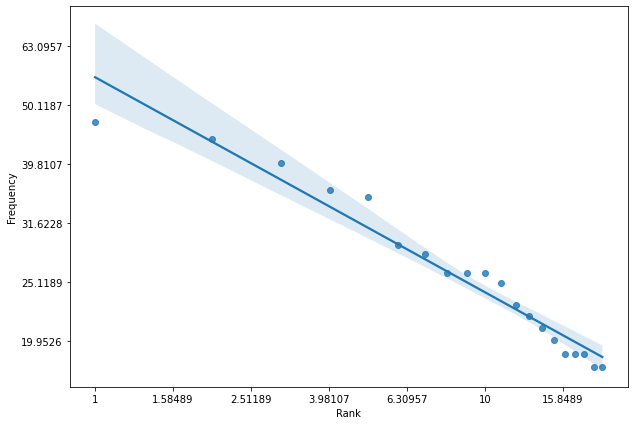

In [83]:
import pandas as pd
import math
import operator

zipWords = []

frequency = []

#Vaihto tassa kielien valilla
for act in noStopwFR:
    for line in act:
        for word in line:
            zipWords.append(word)

frequency = {}

for word in zipWords:
    count = frequency.get(word , 0)
    frequency[ word ] = count + 1

rank = 1
column_header = ['Rank', 'Frequency', 'Frequency * Rank']
df = pd.DataFrame( columns = column_header )
collection = sorted(frequency.items(), key=operator.itemgetter(1), reverse = True)

for word , freq in collection:
    df.loc[word] = [rank, freq, rank*freq]
    rank = rank + 1

f, ax = plt.subplots(figsize=(10, 7))


sns.regplot(x="Rank", y="Frequency",  data=np.log10(df[:20].astype('float64')), ax=ax)


formatter = lambda x, pos: f'{10 ** x:g}'
ax.get_xaxis().set_major_formatter(formatter)
ax.get_yaxis().set_major_formatter(formatter)

plt.show()


## Task 5

>5.	Now we want to assess the coherence each line of English corpus with its counterpart in French corpus. Consider FastText embedding, see Word vectors for 157 languages · fastText,  which is available for several languages.  Write a script that calculates the embedding of the whole line as the average of the FastText embedding of individual words constituting the line. For French corpus, you should use the French embedding available from the above link. Now given the word embedding of a given line in English and its corresponding in French corpus, the consistency score is calculated as the cosine similarity between the two embedding vector.  Then, display in a graph the variation of the consistency score for the whole corpus. Report in a table the mean, standard deviation, kurtosis and skewness values of the consistency scores. 